In [ ]:
!pip install ArabicOcr

In [ ]:
!pip install imutils

In [ ]:
!pip uninstall opencv-python-headless

Found existing installation: opencv-python-headless 4.5.5.62
Uninstalling opencv-python-headless-4.5.5.62:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.62.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-64ac49e1.so.58.91.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-4b79e479.so.58.45.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-805734e8.so.56.51.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-018b8c17.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dist

In [ ]:
!pip install opencv-python-headless==4.1.2.30

     |████████████████████████████████| 21.8 MB 1.9 MB/s 


In [1]:

import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle
import cv2
import imutils
#from ArabicOcr import arabicocr

# Show the figures / plots inside the notebook
def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        plt.axis('off')
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show() 




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section

In [ ]:
from easyocr import Reader
import cv2
def cleanup_text(text):
	# strip out non-ASCII text so we can draw the text on the image
	# using OpenCV
	return "".join([c if ord(c) < 128 else "" for c in text]).strip()

def c_arabic_ocr(image):
  # break the input languages into a comma separated list
  langs = "ar,en".split(",")
  gpu1=-1
  #print("[INFO] OCR'ing with the following languages: {}".format(langs))
# load the input image from disk
  # image = cv2.imread(image_path)
# OCR the input image using EasyOCR
  print("[INFO] OCR'ing input image...")
  reader = Reader(langs, gpu=-1 > 0)
  results = reader.readtext(image)
  #print(result)
  # loop over the results
  # filename=out_image
  # for (bbox, text, prob) in results:
  #   # display the OCR'd text and associated probability
  #   print("[INFO] {:.4f}: {}".format(prob, text))
  #   # unpack the bounding box
  #   (tl, tr, br, bl) = bbox
  #   tl = (int(tl[0]), int(tl[1]))
  #   tr = (int(tr[0]), int(tr[1]))
  #   br = (int(br[0]), int(br[1]))
  #   bl = (int(bl[0]), int(bl[1]))
  #   # cleanup the text and draw the box surrounding the text along
  #   # with the OCR'd text itself
  #   text = cleanup_text(text)
  #   cv2.rectangle(image, tl, br, (0, 255, 0), 2)
  #   cv2.putText(image, text, (tl[0], tl[1] - 10),
  #     cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
  # show the output image
  # cv2.imwrite(filename, image)
  return results


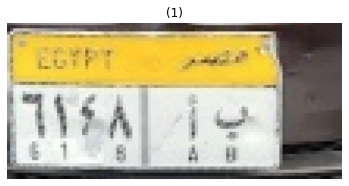

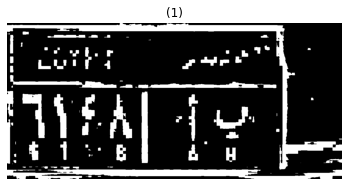

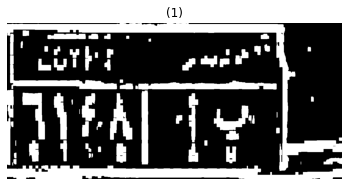

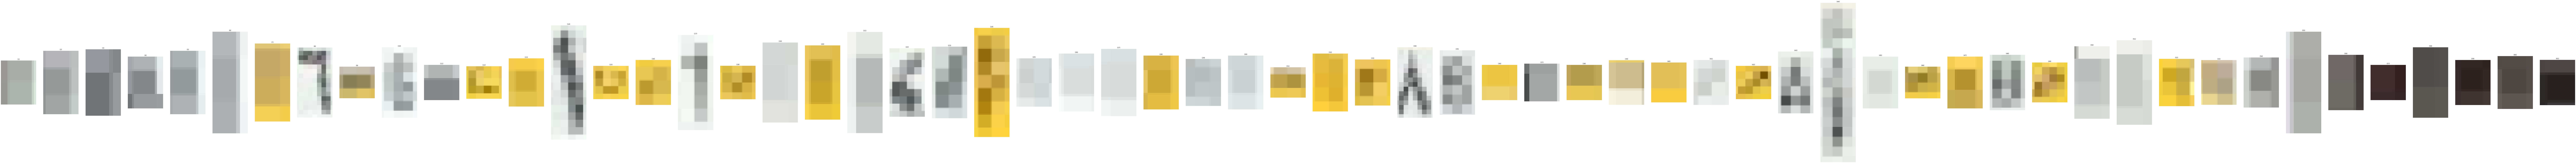

In [3]:

img = cv2.imread("r39.jpg")

# #Resizing
img = imutils.resize(img , width = 1200)

show_images([img])

# Convert the image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
# Performing OTSU threshold
#ret, thresh1 = cv2.threshold(blur, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)
thresh1=cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_MEAN_C ,cv2.THRESH_BINARY_INV,61,15)
show_images([thresh1])

# Specify structure shape and kernel size.
# Kernel size increases or decreases the area
# of the rectangle to be detected.
# A smaller value like (10, 10) will detect
# each word instead of a sentence.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 10))

# Applying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)
show_images([dilation])

# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_TREE,
                                                 cv2.CHAIN_APPROX_NONE)
 
# Creating a copy of image
im2 = img.copy()
 
# Looping through the identified contours
# Then rectangular part is cropped and passed on
# to pytesseract for extracting text from it
# Extracted text is then written into the text file


contours = sorted(contours, key=lambda tup: cv2.boundingRect(tup)[0])
chars=[]
txt=""
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    x-=3
    y-=3
    w+=6
    h+=6
    if(w/h>0.2 and w/h<1.25):
        # Drawing a rectangle on copied image
        rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        # Cropping the text block for giving input to OCR
        cropped = img[y:y + h, x:x + w]
        chars.append(cropped)
        # Apply OCR on the cropped image
        # text = pytesseract.pytesseract.image_to_string(cropped, lang='ara', config='--psm 6'
        # out=cropped.copy()
        # text = c_arabic_ocr(cropped)
        # print(text)
        # txt+=text
        # print('heheheh')
     

show_images(chars)
# print(txt)

In [ ]:

img = cv2.imread("r20.jpg",cv2.IMREAD_GRAYSCALE)

# #Resizing
# img = imutils.resize(img , width = 1200)
factor=1200/img.shape[0]
width=int(img.shape[0]*factor)
height=int(img.shape[1]*factor)

dim = ( height ,width  )
img=cv2.resize(img,dim, interpolation = cv2.INTER_AREA)

show_images([img])

blur = cv2.GaussianBlur(gray, (3,3), 0)

# Performing OTSU threshold
ret, thresh1 = cv2.threshold(blur, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
# thresh1=cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_MEAN_C ,cv2.THRESH_BINARY_INV,61,15)
show_images([thresh1])

# Specify structure shape and kernel size.
# Kernel size increases or decreases the area
# of the rectangle to be detected.
# A smaller value like (10, 10) will detect
# each word instead of a sentence.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 30))

#===========  TODO  =======================
# Applying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)
show_images([dilation])


# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_TREE,
                                                 cv2.CHAIN_APPROX_NONE)
 

 
# Looping through the identified contours
# Then rectangular part is cropped and passed on
# to pytesseract for extracting text from it
# Extracted text is then written into the text file


contours = sorted(contours, key=lambda tup: cv2.boundingRect(tup)[0])
chars=[]
txt=""
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    x-=6
    y-=6
    w+=12
    h+=12
    if(w/h>0.12 and w/h<1.1):
        # Drawing a rectangle on copied image
        rect = cv2.rectangle(dilation, (x, y), (x + w, y + h), (0, 255, 0), 2)
        # Cropping the text block for giving input to OCR
        cropped = dilation[y:y + h, x:x + w]
        chars.append(cropped)
        
        # Apply OCR on the cropped image
        print("[INFO] OCR'ing input image...")
        langs = "ar,en".split(",")
        reader = Reader(langs, gpu=-1 > 0)
        results = reader.readtext(cropped)
        
        print(results)
        for res in results:
          txt+=cleanup_text(res[1])
          print(txt)

        # text = pytesseract.pytesseract.image_to_string(cropped, lang='ara', config='--psm 6')
    
     

show_images(chars)
print(txt)

In [ ]:
###############      METHOD  2      #################


